In [1]:
import numpy as np
import torch
from hmc_u1 import HMC_U1
from field_transformations import manual_field_transformation
from nn_model import NNFieldTransformation
from utils import plot_results, compute_autocorrelation

In [2]:
# Parameters
""" 
total_time = n_steps * step_size should be around 1 to 2 units.
If the energy conservation is not good, try to reduce the step size.
"""

lattice_size = 16
beta = 3
n_thermalization_steps = 15000
n_steps = 20
step_size = 0.001
n_iterations = 5000

hmc = HMC_U1(lattice_size, beta, n_thermalization_steps, n_steps, step_size)

### No Field Transformation

>>> No Field Transformation


Thermalizing:   0%|          | 0/15000 [00:00<?, ?it/s]

Running HMC: 100%|██████████| 5000/5000 [00:04<00:00, 1211.83it/s]


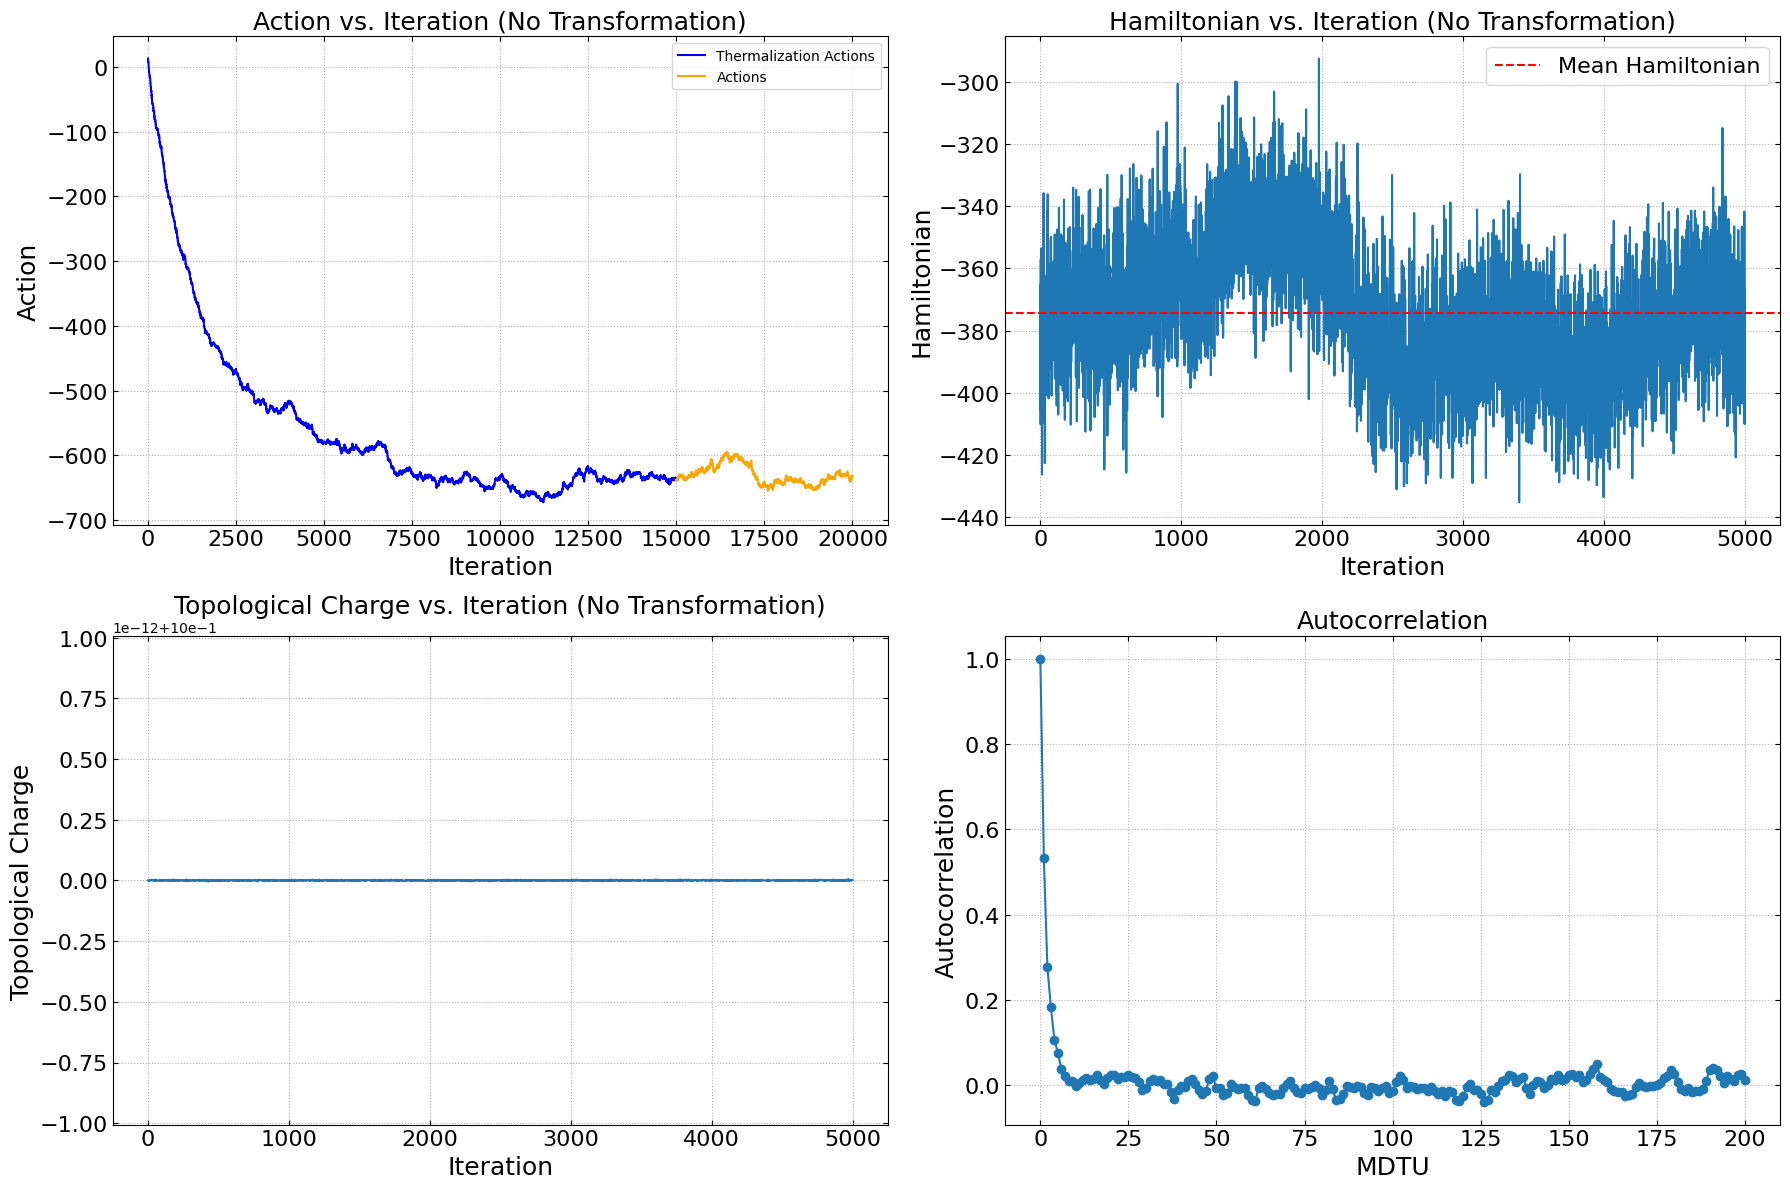

Thermalization acceptance rate: 0.4826
Acceptance rate: 0.4650
Relative variation of Hamiltonian (delta H / H_mean): -0.3819
Variation of topological charge (delta Q): 0.0000


In [3]:
print(">>> No Field Transformation")

# Thermalize the system
theta_thermalized, thermalization_actions, thermalization_acceptance_rate = hmc.thermalize()

# Run HMC without field transformation
final_config, actions, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized)

# Compute autocorrelation of the topological charge
max_lag = 200
autocorrelations = compute_autocorrelation(topological_charges, max_lag)

# Plot results
plot_results(thermalization_actions, actions, topological_charges, hamiltonians, autocorrelations, title_suffix="(No Transformation)")

# Print the acceptance rate
print(f"Thermalization acceptance rate: {thermalization_acceptance_rate:.4f}")
print(f"Acceptance rate: {acceptance_rate:.4f}")

# Calculate and print the variation of Hamiltonian (delta H) relative to mean H
delta_H = np.max(hamiltonians) - np.min(hamiltonians)
H_mean = np.mean(hamiltonians)
relative_delta_H = delta_H / H_mean
print(f"Relative variation of Hamiltonian (delta H / H_mean): {relative_delta_H:.4f}")

# Calculate and print the variation of topological charge (delta Q)
delta_Q = np.max(topological_charges) - np.min(topological_charges)
print(f"Variation of topological charge (delta Q): {delta_Q:.4f}")

### Neural Network Field Transformation

>>> Neural Network Field Transformation


Training Neural Network:  57%|█████▋    | 283/500 [00:00<00:00, 727.69it/s]

Training Neural Network: 100%|██████████| 500/500 [00:00<00:00, 727.06it/s]


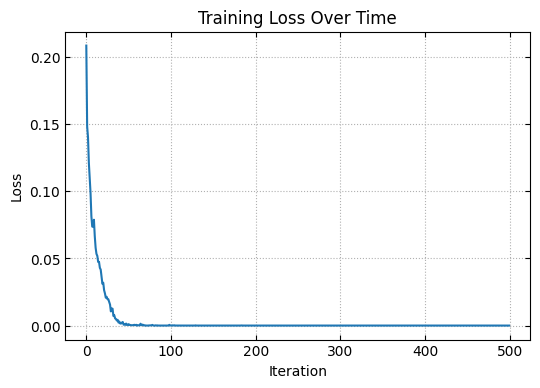

Running HMC: 100%|██████████| 5000/5000 [00:05<00:00, 925.20it/s]


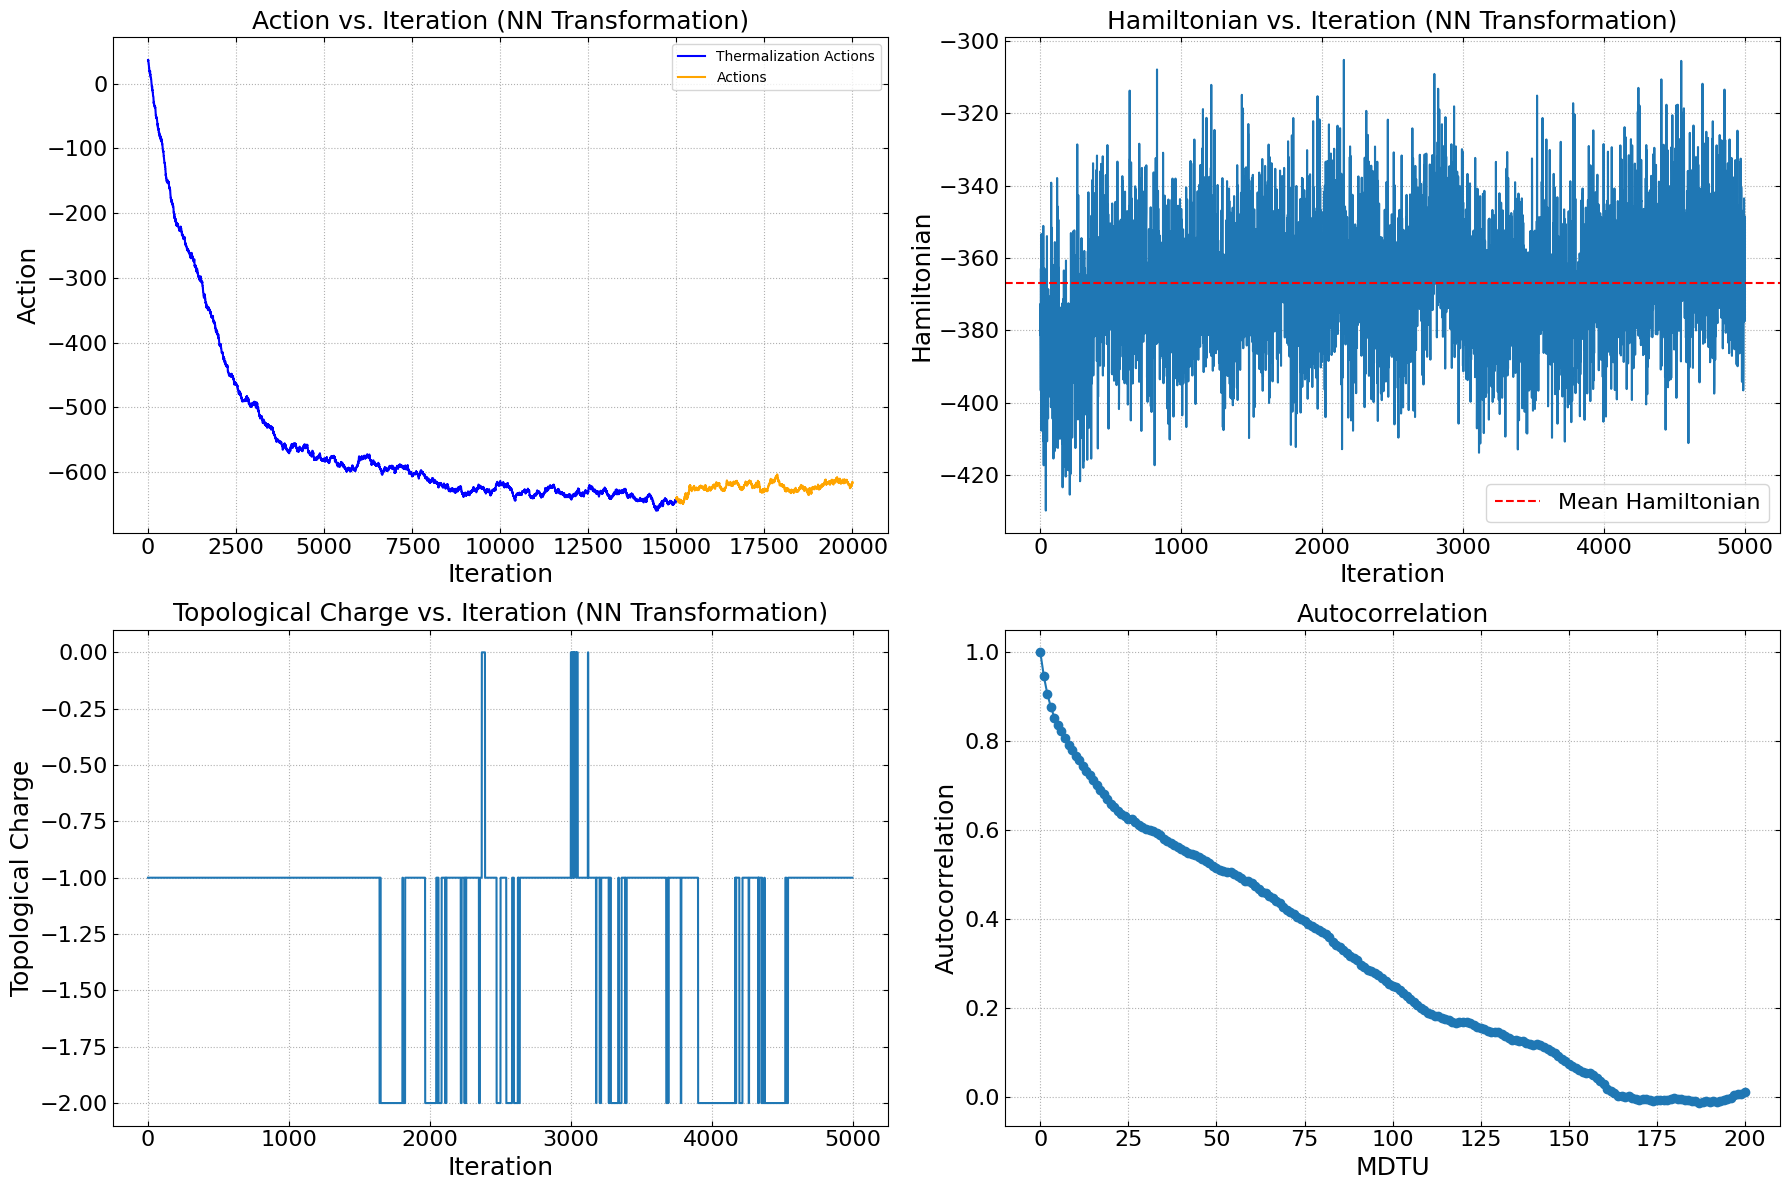

Thermalization acceptance rate: 0.4923
Acceptance rate: 0.4808
Relative variation of Hamiltonian (delta H / H_mean): -0.3392
Variation of topological charge (delta Q): 2.0000


In [4]:
print(">>> Neural Network Field Transformation")

# Train the neural network force
nn_transformation = NNFieldTransformation(lattice_size)
nn_transformation.train(hmc, n_iterations=500)

# Thermalize the system
theta_thermalized, thermalization_actions, thermalization_acceptance_rate = hmc.thermalize(field_transformation=nn_transformation)

# check boundary elements are matched
assert np.all(np.roll(theta_thermalized[1], shift=-1, axis=0)[-1, :] == theta_thermalized[1][0, :])
assert np.all(np.roll(theta_thermalized[0], shift=-1, axis=1)[:, -1] == theta_thermalized[0][:, 0])

# Run HMC without field transformation
final_config, actions, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized, field_transformation=nn_transformation)

# Compute autocorrelation of the topological charge
max_lag = 200
autocorrelations = compute_autocorrelation(topological_charges, max_lag)

# Plot results
plot_results(thermalization_actions, actions, topological_charges, hamiltonians, autocorrelations, title_suffix="(NN Transformation)")

# Print the acceptance rate
print(f"Thermalization acceptance rate: {thermalization_acceptance_rate:.4f}")
print(f"Acceptance rate: {acceptance_rate:.4f}")

# Calculate and print the variation of Hamiltonian (delta H) relative to mean H
delta_H = np.max(hamiltonians) - np.min(hamiltonians)
H_mean = np.mean(hamiltonians)
relative_delta_H = delta_H / H_mean
print(f"Relative variation of Hamiltonian (delta H / H_mean): {relative_delta_H:.4f}")

# Calculate and print the variation of topological charge (delta Q)
delta_Q = np.max(topological_charges) - np.min(topological_charges)
print(f"Variation of topological charge (delta Q): {delta_Q:.4f}")

In [5]:
# # Save the trained neural network field transformation
# model_save_path = "nn_field_transformation.pth"
# torch.save(nn_transformation.model.state_dict(), model_save_path)
# print(f"Neural network field transformation model saved to {model_save_path}")

# # Load the trained neural network field transformation
# nn_transformation_reuse = NNFieldTransformation(lattice_size)
# nn_transformation_reuse.model.load_state_dict(torch.load(model_save_path))
# print(f"Neural network field transformation model loaded from {model_save_path}")

# # Thermalize the system using the loaded model
# theta_thermalized_reuse, thermalization_actions_reuse, thermalization_acceptance_rate_reuse = hmc.thermalize(field_transformation=nn_transformation_reuse)

# # Run HMC with the loaded field transformation
# final_config_reuse, actions_reuse, acceptance_rate_reuse, topological_charges_reuse, hamiltonians_reuse = hmc.run(n_iterations, theta_thermalized_reuse, field_transformation=nn_transformation_reuse)

# # Compute autocorrelation of the topological charge
# autocorrelations_reuse = compute_autocorrelation(topological_charges_reuse, max_lag)

# # Plot results
# plot_results(thermalization_actions_reuse, actions_reuse, topological_charges_reuse, hamiltonians_reuse, autocorrelations_reuse, title_suffix="(NN Transformation Reuse)")

# # Print the acceptance rate
# print(f"Thermalization acceptance rate (reuse): {thermalization_acceptance_rate_reuse:.4f}")
# print(f"Acceptance rate (reuse): {acceptance_rate_reuse:.4f}")

# # Calculate and print the variation of Hamiltonian (delta H) relative to mean H
# delta_H_reuse = np.max(hamiltonians_reuse) - np.min(hamiltonians_reuse)
# H_mean_reuse = np.mean(hamiltonians_reuse)
# relative_delta_H_reuse = delta_H_reuse / H_mean_reuse
# print(f"Relative variation of Hamiltonian (delta H / H_mean) (reuse): {relative_delta_H_reuse:.4f}")

# # Calculate and print the variation of topological charge (delta Q)
# delta_Q_reuse = np.max(topological_charges_reuse) - np.min(topological_charges_reuse)
# print(f"Variation of topological charge (delta Q) (reuse): {delta_Q_reuse:.4f}")



### Manual Field Transformation

>>> Manual Field Transformation


Thermalizing:   5%|▍         | 737/15000 [00:00<00:11, 1224.84it/s]

Running HMC: 100%|██████████| 5000/5000 [00:04<00:00, 1203.54it/s]


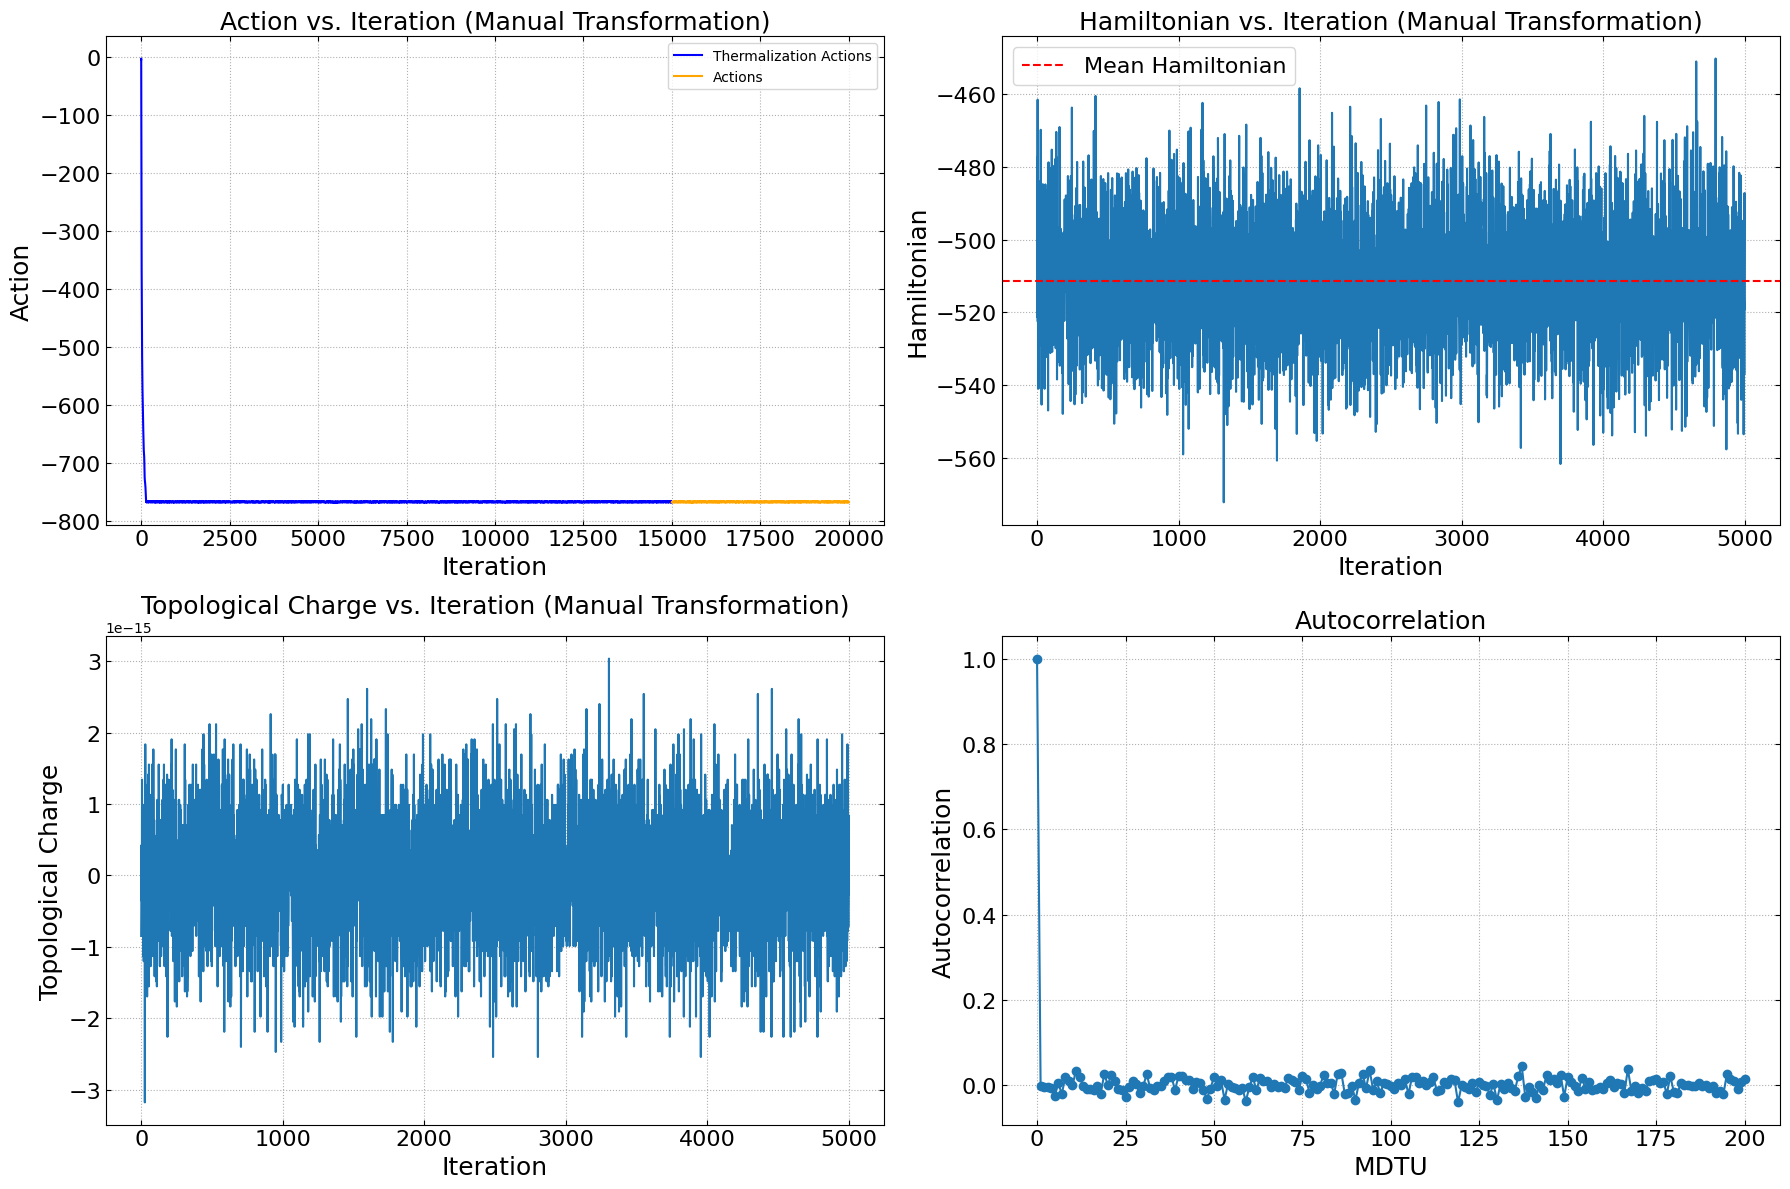

Thermalization acceptance rate: 0.5359
Acceptance rate: 0.5348
Relative variation of Hamiltonian (delta H / H_mean): -0.2383
Variation of topological charge (delta Q): 0.0000


In [6]:
print(">>> Manual Field Transformation")

# Thermalize the system
theta_thermalized, thermalization_actions, thermalization_acceptance_rate = hmc.thermalize(field_transformation=manual_field_transformation)

# Run HMC without field transformation
final_config, actions, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized, field_transformation=manual_field_transformation)

# Compute autocorrelation of the topological charge
max_lag = 200
autocorrelations = compute_autocorrelation(topological_charges, max_lag)

# Plot results
plot_results(thermalization_actions, actions, topological_charges, hamiltonians, autocorrelations, title_suffix="(Manual Transformation)")

# Print the acceptance rate
print(f"Thermalization acceptance rate: {thermalization_acceptance_rate:.4f}")
print(f"Acceptance rate: {acceptance_rate:.4f}")

# Calculate and print the variation of Hamiltonian (delta H) relative to mean H
delta_H = np.max(hamiltonians) - np.min(hamiltonians)
H_mean = np.mean(hamiltonians)
relative_delta_H = delta_H / H_mean
print(f"Relative variation of Hamiltonian (delta H / H_mean): {relative_delta_H:.4f}")

# Calculate and print the variation of topological charge (delta Q)
delta_Q = np.max(topological_charges) - np.min(topological_charges)
print(f"Variation of topological charge (delta Q): {delta_Q:.4f}")